Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.97      0.93        63
         yes       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



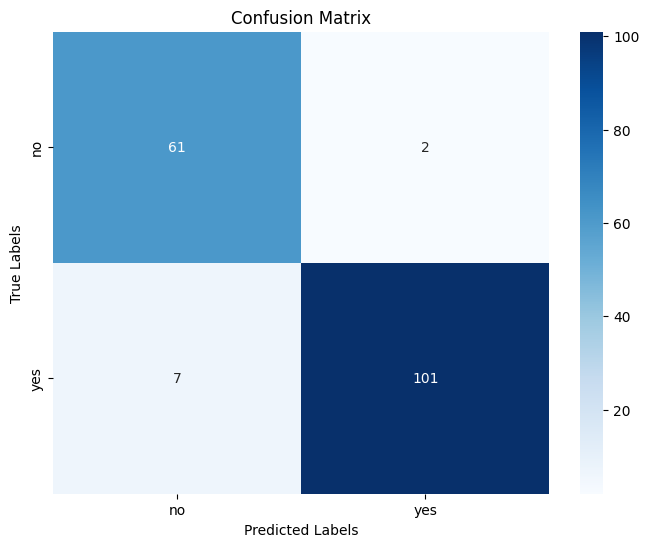

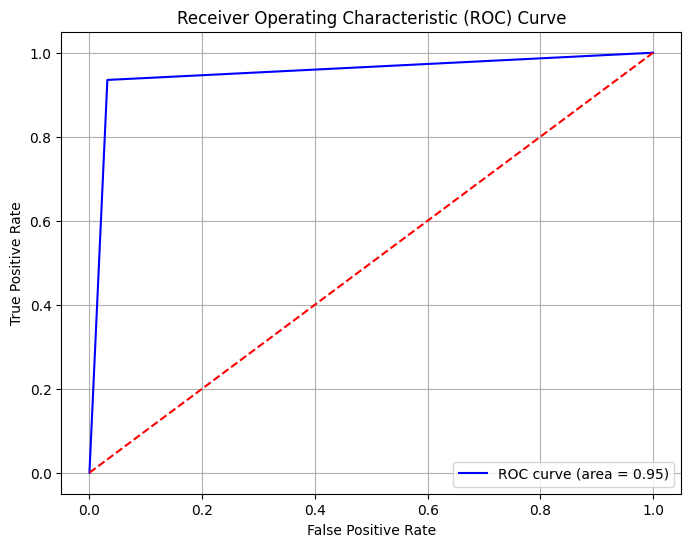

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Loading the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Mapping the target to 'yes' (malignant) and 'no' (benign)
target_names = ['no', 'yes']
y_mapped = np.where(y == 0, 'no', 'yes')

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.3, random_state=42)

# Training the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=target_names)

# Displaying the classification report
class_report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", class_report)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculating ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
